In [1]:
# Libraries
import itertools
from importlib import resources
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

from drdt.helper_functions import DecisionRuleCreatorFromDecisionTable, Reduction, R_SR, R_AD, SAlphaStep, SPlus, SMax, NCover, NGreedy
from drdt.algorithms import DynamicProgrammingAlgorithms, A_C_N, A_C_G
from drdt.helper_functions import DecisionRuleCreatorFromDecisionTable
pd.options.mode.chained_assignment = None


In [2]:
problems = ['AR', 'EAR', 'SR', 'ESR', 'AD', 'EAD']
dataset_name = "Balance Scale"

DP = []
NC = []
NCgreedy = []
Gr = []

# Loading Data

In [3]:
# Loading DecisionTable
balance_scale = fetch_ucirepo(id=12) 
  
# data (as pandas dataframes) 
X = balance_scale.data.features 
y = balance_scale.data.targets 

DecisionTable = pd.concat([X, y], axis=1).sample(n=25, random_state=222)
DecisionTable

,right-distance,right-weight,left-distance,left-weight,class
467,3,4,4,4,L
438,4,3,3,4,B
515,1,4,1,5,L
27,3,1,2,1,R
190,1,4,3,2,L
612,3,3,5,5,L
136,2,3,1,2,R
500,1,1,1,5,L
18,4,4,1,1,R
496,2,5,5,4,L


In [4]:
# Creating Decision Rule System
S = DecisionRuleCreatorFromDecisionTable(DecisionTable).applymap(lambda x: str(x) if pd.notnull(x) else x)
S = S.dropna(axis=1, how='all') # Drop the columns with all None
S

100%|██████████████████████████████████████████| 25/25 [00:00<00:00, 734.99it/s]


,right-distance,right-weight,left-distance,left-weight,class
467,NaN,NaN,4.0,NaN,L
438,4.0,3.0,NaN,NaN,B
515,1.0,4.0,NaN,NaN,L
27,3.0,NaN,2.0,NaN,R
190,1.0,4.0,NaN,NaN,L
612,NaN,NaN,5.0,NaN,L
136,NaN,NaN,1.0,2.0,R
500,1.0,1.0,NaN,NaN,L
18,4.0,4.0,NaN,NaN,R
496,NaN,NaN,5.0,NaN,L


# Dataset Analyses

In [5]:
n = len(S.columns)-1
print(f"Number of features  = {n}")

Number of features  = 4


In [6]:
print(f"Does # of features = d  = {not S.dropna().empty}")

Does # of features = d  = False


In [7]:
# Count non-NaN values for each row
non_nan_counts = S.count(axis=1)

# Find the index
max_non_nan_row_index = non_nan_counts.idxmax()

# Retrieve the row
max_non_nan_row = S.loc[max_non_nan_row_index]

# Number of non-NaN values in the row
max_non_nan_count = non_nan_counts[max_non_nan_row_index]

d = max_non_nan_count - 1

print(f"d = {d}") # remove 1 because of last class column

d = 2


In [8]:
P = S
P_plus = SPlus(P)
B = NCover(P_plus)
print(f"Length of Node Cover for AR = {len(B)}")

Length of Node Cover for AR = 4


In [9]:
P = R_SR(S)
P_plus = SPlus(P)
B = NCover(P_plus)
print(f"Length of Node Cover for SR = {len(B)}")

Length of Node Cover for SR = 4


In [10]:
P = R_AD(S)
P_plus = SPlus(P)
B = NCover(P_plus)
print(f"Length of Node Cover for AD = {len(B)}")

Length of Node Cover for AD = 4


In [11]:
P = S
P_plus = SPlus(P)
B = NGreedy(P_plus)
print(f"Length of Node Cover greedy for AR = {len(B)}")

Length of Node Cover greedy for AR = 2


In [12]:
P = R_SR(S)
P_plus = SPlus(P)
B = NGreedy(P_plus)
print(f"Length of Node Cover greedy for SR = {len(B)}")

Length of Node Cover greedy for SR = 2


In [13]:
P = R_AD(S)
P_plus = SPlus(P)
B = NGreedy(P_plus)
print(f"Length of Node Cover greedy for AD = {len(B)}")

Length of Node Cover greedy for AD = 2


# Dynamic Programming

In [14]:
alg = DynamicProgrammingAlgorithms(C="AR")
depth = alg.A_DP(S)
DP.append(depth)
print(f"DP AR = {depth}")

DP AR = 4


In [15]:
alg = DynamicProgrammingAlgorithms(C="EAR")
depth = alg.A_DP(S)
DP.append(depth)
print(f"DP EAR = {depth}")

DP EAR = 4


In [16]:
alg = DynamicProgrammingAlgorithms(C="SR")
depth = alg.A_DP(S)
DP.append(depth)
print(f"DP SR = {depth}")

DP SR = 3


In [17]:
alg = DynamicProgrammingAlgorithms(C="ESR")
depth = alg.A_DP(S)
DP.append(depth)
print(f"DP ESR = {depth}")

DP ESR = 4


In [18]:
alg = DynamicProgrammingAlgorithms(C="AD")
depth = alg.A_DP(S)
DP.append(depth)
print(f"DP AD = {depth}")

DP AD = 4


In [19]:
alg = DynamicProgrammingAlgorithms(C="EAD")
depth = alg.A_DP(S)
DP.append(depth)
print(f"DP EAD = {depth}")

DP EAD = 4


# Combinations

In [20]:
column_values = []

for column in S.columns[:-1]: #ignoring class column
    column_values.append(list(S[column].dropna().unique()))
    
# All possible combinations    
combinations = list(itertools.product(*column_values))


In [21]:
column_values_extension = []

for column in S.columns[:-1]: #ignoring class column
    column_values_extension.append(list(S[column].dropna().unique()) + ['*'])
    
# All possible combinations with extension    
extended_combinations = list(itertools.product(*column_values_extension))


# Node Cover

In [22]:
depths = []

for comb in tqdm(combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="AR", N="cover")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NC AR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NC.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 161.23it/s]

NC AR
(Max Depth, Min Depth, Average Depth) = (4, 4, 4.0)


In [23]:
depths = []

for comb in tqdm(extended_combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="EAR", N="cover")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NC EAR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NC.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|████████████████████████████████████████| 360/360 [00:02<00:00, 179.06it/s]

NC EAR
(Max Depth, Min Depth, Average Depth) = (4, 4, 4.0)


In [24]:
depths = []

for comb in tqdm(combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="SR", N="cover")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NC SR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NC.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 28.59it/s]

NC SR
(Max Depth, Min Depth, Average Depth) = (4, 4, 4.0)


In [25]:
depths = []

for comb in tqdm(extended_combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="ESR", N="cover")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NC ESR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NC.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 360/360 [00:13<00:00, 27.16it/s]

NC ESR
(Max Depth, Min Depth, Average Depth) = (4, 4, 4.0)


In [26]:
depths = []

for comb in tqdm(combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="AD", N="cover")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NC AD")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NC.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 41.13it/s]

NC AD
(Max Depth, Min Depth, Average Depth) = (4, 4, 4.0)


In [27]:
depths = []

for comb in tqdm(extended_combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="EAD", N="cover")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NC EAD")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NC.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 360/360 [00:08<00:00, 42.06it/s]

NC EAD
(Max Depth, Min Depth, Average Depth) = (4, 4, 4.0)


# Node Cover Greedy

In [28]:
depths = []

for comb in tqdm(combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="AR", N="greedy")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NCgreedy AR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NCgreedy.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 109.03it/s]

NCgreedy AR
(Max Depth, Min Depth, Average Depth) = (4, 3, 3.25)


In [29]:
depths = []

for comb in tqdm(extended_combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="EAR", N="greedy")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NCgreedy EAR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NCgreedy.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|████████████████████████████████████████| 360/360 [00:02<00:00, 122.23it/s]

NCgreedy EAR
(Max Depth, Min Depth, Average Depth) = (4, 2, 3.033333333333333)


In [30]:
depths = []

for comb in tqdm(combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="SR", N="greedy")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NCgreedy SR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NCgreedy.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 26.05it/s]

NCgreedy SR
(Max Depth, Min Depth, Average Depth) = (4, 2, 2.6)


In [31]:
depths = []

for comb in tqdm(extended_combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="ESR", N="greedy")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NCgreedy ESR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NCgreedy.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 360/360 [00:13<00:00, 25.91it/s]

NCgreedy ESR
(Max Depth, Min Depth, Average Depth) = (4, 2, 2.6)


In [32]:
depths = []

for comb in tqdm(combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="AD", N="greedy")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NCgreedy AD")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NCgreedy.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 39.60it/s]

NCgreedy AD
(Max Depth, Min Depth, Average Depth) = (4, 2, 3.0)


In [33]:
depths = []

for comb in tqdm(extended_combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_N(C="EAD", N="greedy")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("NCgreedy EAD")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
NCgreedy.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 360/360 [00:08<00:00, 40.55it/s]

NCgreedy EAD
(Max Depth, Min Depth, Average Depth) = (4, 2, 2.8666666666666667)


# Greedy

In [34]:
depths = []

for comb in tqdm(combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_G(C="AR")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("Greedy AR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
Gr.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 211.09it/s]

Greedy AR
(Max Depth, Min Depth, Average Depth) = (4, 3, 3.25)


In [35]:
depths = []

for comb in tqdm(extended_combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_G(C="EAR")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("Greedy EAR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
Gr.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|████████████████████████████████████████| 360/360 [00:01<00:00, 222.91it/s]

Greedy EAR
(Max Depth, Min Depth, Average Depth) = (4, 2, 3.033333333333333)


In [36]:
depths = []

for comb in tqdm(combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_G(C="SR")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("Greedy SR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
Gr.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 26.43it/s]

Greedy SR
(Max Depth, Min Depth, Average Depth) = (4, 2, 2.42)


In [37]:
depths = []

for comb in tqdm(extended_combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_G(C="ESR")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("Greedy ESR")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
Gr.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 360/360 [00:12<00:00, 27.80it/s]

Greedy ESR
(Max Depth, Min Depth, Average Depth) = (4, 2, 2.4833333333333334)


In [38]:
depths = []

for comb in tqdm(combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_G(C="AD")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("Greedy AD")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
Gr.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 42.50it/s]

Greedy AD
(Max Depth, Min Depth, Average Depth) = (4, 2, 2.94)


In [39]:
depths = []

for comb in tqdm(extended_combinations):
    #creating delta
    delta = pd.DataFrame([list(comb)], columns=list(S.columns[:-1]))
    
    delta = delta.loc[0]
    
    alg = A_C_G(C="EAD")
    
    depth, _ = alg.solve(S, delta=delta)
    
    depths.append(depth)
    
print("Greedy EAD")    
print("(Max Depth, Min Depth, Average Depth) =", (max(depths), min(depths), sum(depths)/len(depths)))
Gr.append((max(depths), min(depths), round(sum(depths)/len(depths), 2)))

100%|█████████████████████████████████████████| 360/360 [00:08<00:00, 42.86it/s]

Greedy EAD
(Max Depth, Min Depth, Average Depth) = (4, 2, 2.8333333333333335)


# PLOTS

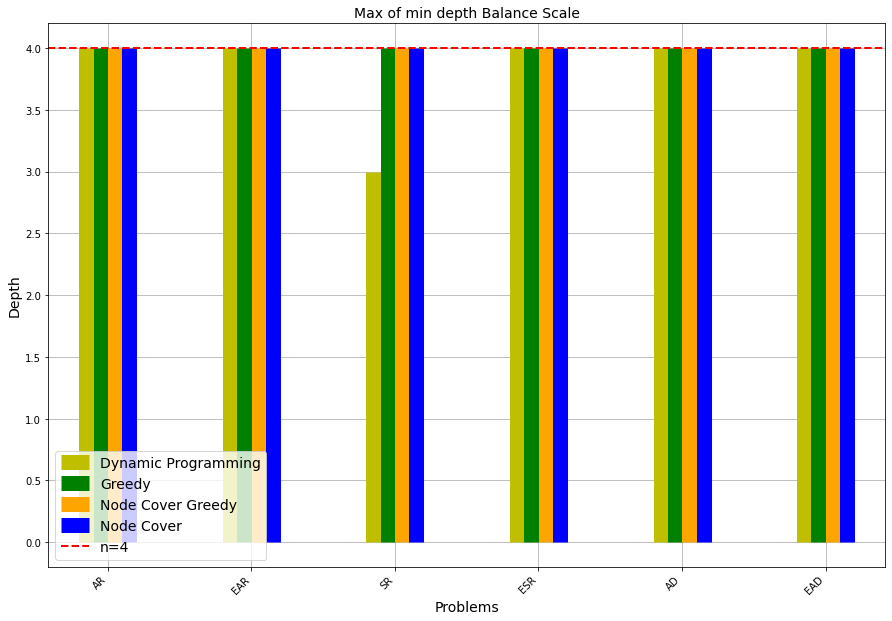

In [40]:
problem_indices = np.arange(len(problems))

plt.figure(figsize=(15,10))

offset = 0.1
x_offsets = np.array([-1.5*offset, -0.5*offset, 0.5*offset, 1.5*offset])

plt.vlines(problem_indices + x_offsets[0], 0, DP, color='y', linewidth=15, label='Dynamic Programming')
plt.vlines(problem_indices + x_offsets[1], 0, [a for a,_,_ in Gr], color='g', linewidth=15, label='Greedy')
plt.vlines(problem_indices + x_offsets[2], 0, [a for a,_,_ in NCgreedy], color='orange', linewidth=15, label='Node Cover Greedy')
plt.vlines(problem_indices + x_offsets[3], 0, [a for a,_,_ in NC], color='b', linewidth=15, label='Node Cover')

plt.axhline(y=n, color='r', linestyle='--', linewidth=2, label=f'n={n}')

plt.xticks(problem_indices, problems, rotation=45, ha='right')

plt.title(f'Max of min depth {dataset_name}', fontsize=14)
plt.xlabel('Problems', fontsize=14)
plt.ylabel('Depth', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.show()


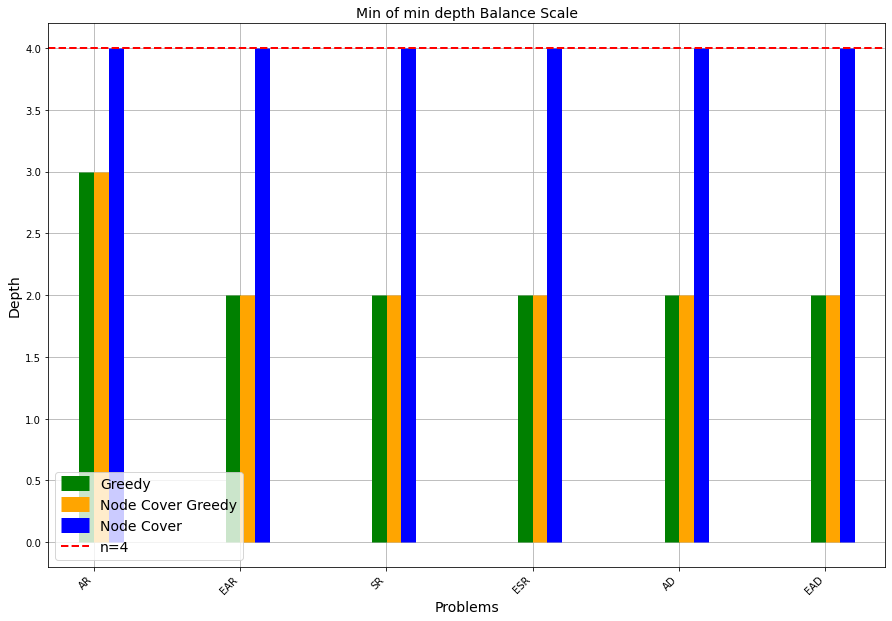

In [41]:
problem_indices = np.arange(len(problems))

plt.figure(figsize=(15,10))

offset = 0.1
x_offsets = np.array([-1.5*offset, -0.5*offset, 0.5*offset, 1.5*offset])

plt.vlines(problem_indices + x_offsets[1], 0, [a for _,a,_ in Gr], color='g', linewidth=15, label='Greedy')
plt.vlines(problem_indices + x_offsets[2], 0, [a for _,a,_ in NCgreedy], color='orange', linewidth=15, label='Node Cover Greedy')
plt.vlines(problem_indices + x_offsets[3], 0, [a for _,a,_ in NC], color='b', linewidth=15, label='Node Cover')

plt.axhline(y=n, color='r', linestyle='--', linewidth=2, label=f'n={n}')

plt.xticks(problem_indices, problems, rotation=45, ha='right')

plt.title(f'Min of min depth {dataset_name}', fontsize=14)
plt.xlabel('Problems', fontsize=14)
plt.ylabel('Depth', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.show()

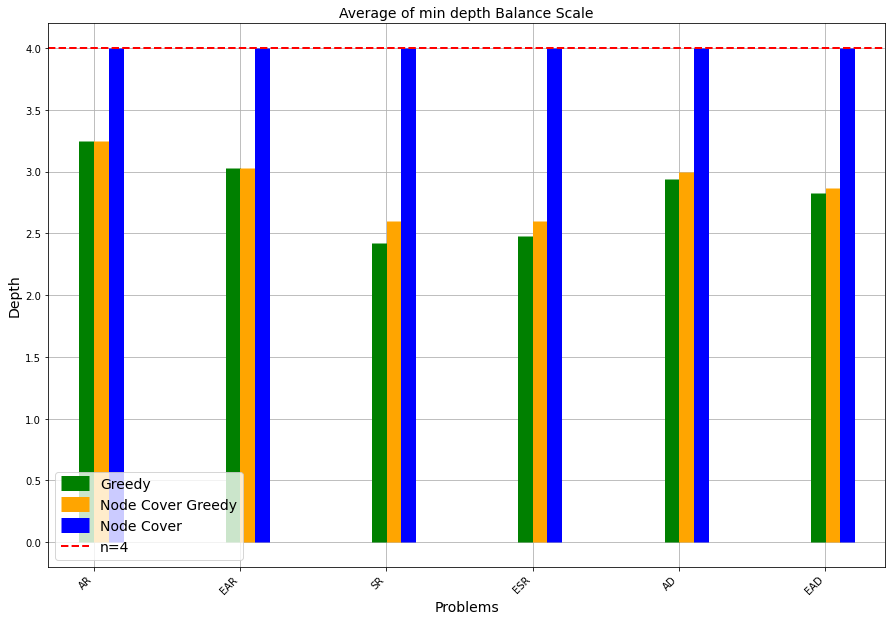

In [42]:
problem_indices = np.arange(len(problems))

plt.figure(figsize=(15,10))

offset = 0.1
x_offsets = np.array([-1.5*offset, -0.5*offset, 0.5*offset, 1.5*offset])

plt.vlines(problem_indices + x_offsets[1], 0, [a for _,_,a in Gr], color='g', linewidth=15, label='Greedy')
plt.vlines(problem_indices + x_offsets[2], 0, [a for _,_,a in NCgreedy], color='orange', linewidth=15, label='Node Cover Greedy')
plt.vlines(problem_indices + x_offsets[3], 0, [a for _,_,a in NC], color='b', linewidth=15, label='Node Cover')

plt.axhline(y=n, color='r', linestyle='--', linewidth=2, label=f'n={n}')

plt.xticks(problem_indices, problems, rotation=45, ha='right')

plt.title(f'Average of min depth {dataset_name}', fontsize=14)
plt.xlabel('Problems', fontsize=14)
plt.ylabel('Depth', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.show()